In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

Read the training data set and display the first few rows.

In [2]:
training_data = pd.read_csv('data/train.csv', index_col=0)
training_data.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
Index,,,,,,,,,,,,,,,,
0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


Now read the test data set. Note that the return $y$ and weights $w$ are missing

In [3]:
test_data = pd.read_csv('data/test.csv', index_col=0)
test_data.head()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
Index,,,,,,,,,,,,,,
0,1,13,363,0.000842,0.436594,0.477848,1.535381e-06,4.353950e-06,7.718616e-06,1.632886e-05,3.267851e-05,0.001661,9.724611e-07,112.968475
1,1,13,1223,0.020800,0.636143,0.670798,5.204133e-06,9.546012e-06,1.575258e-05,2.804666e-05,1.082500e-05,0.002104,2.146299e-05,100.000000
2,1,13,1372,0.068580,0.478891,0.481816,5.433730e-08,1.733539e-07,3.866963e-07,8.520664e-07,2.103176e-06,0.000222,3.085296e-08,188.335508
3,1,13,1942,0.011986,0.463201,0.294900,1.103215e-08,3.555558e-08,7.280376e-08,1.364231e-07,3.155050e-07,0.000141,1.678216e-08,212.123913
4,1,13,2712,0.000164,0.549980,0.352332,4.494670e-07,8.503405e-07,1.222847e-06,1.901114e-06,4.048304e-06,0.001235,4.595200e-07,124.024977


## Analyse Dependencies

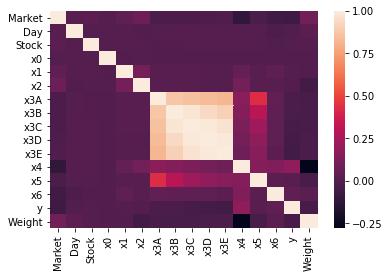

In [4]:
corr = training_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

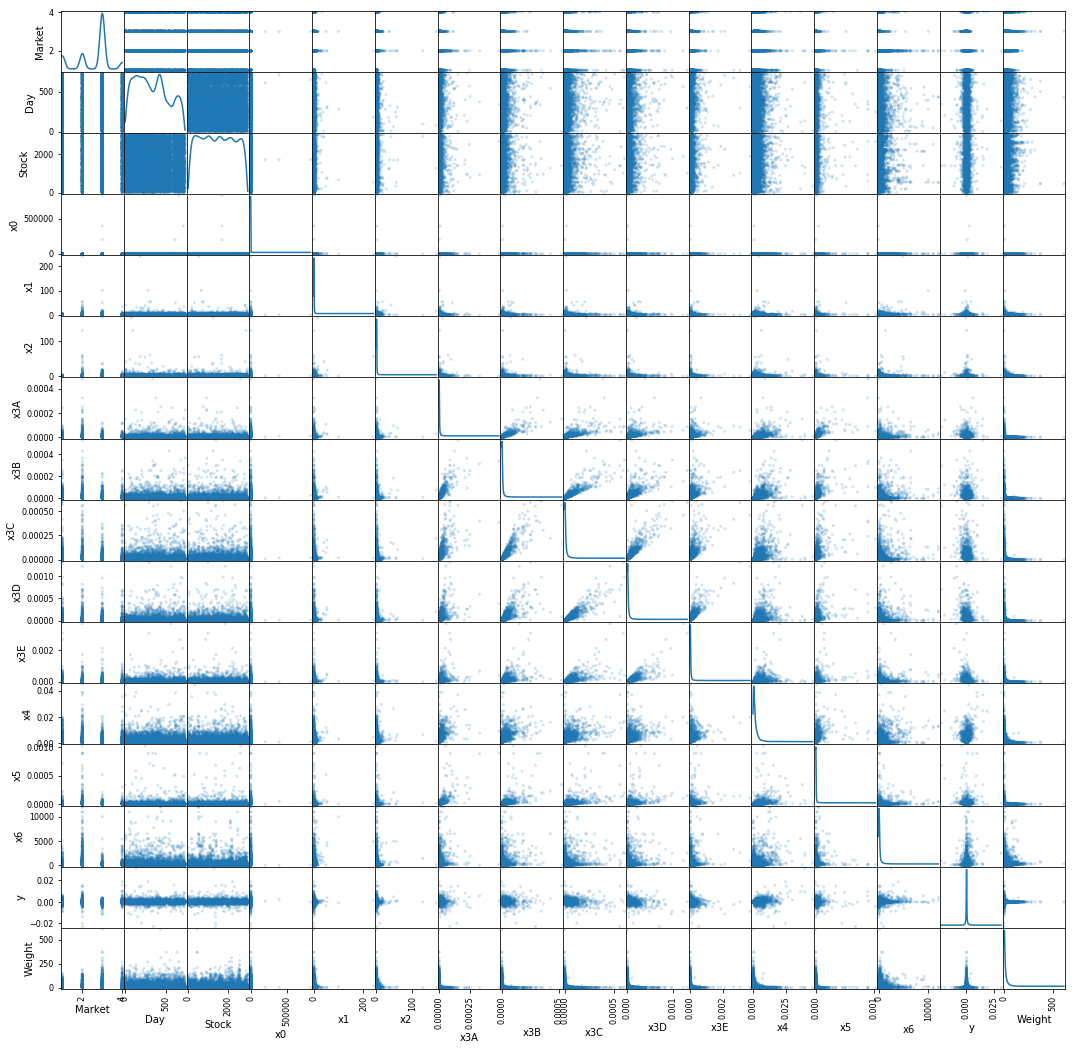

In [5]:
pd.plotting.scatter_matrix(training_data.iloc[::50].select_dtypes(include=['int', 'float']), alpha=0.2, figsize=(18, 18), diagonal='kde')
plt.show()

In [6]:
training_data.describe()

,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
count,623817.000000,623817.000000,623817.000000,6.238170e+05,623762.000000,623812.000000,6.238170e+05,6.238170e+05,623817.000000,623817.000000,623817.000000,623817.000000,6.238170e+05,623817.000000,623817.000000,623817.000000
mean,2.611854,343.908465,1504.311899,3.513422e+01,1.515302,0.975639,3.569196e-06,7.650938e-06,0.000013,0.000020,0.000033,0.001772,5.257464e-06,275.436028,0.000075,14.723355
std,0.816069,209.625123,874.545393,7.673634e+03,4.594337,2.498639,5.585191e-05,1.104701e-04,0.000196,0.000355,0.000583,0.002313,8.692817e-05,1799.850048,0.001047,24.390745
min,1.000000,1.000000,0.000000,0.000000e+00,0.000013,0.000313,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000e+00,1.000000,-0.071099,0.002797
25%,2.000000,161.000000,746.000000,2.038527e-03,0.701935,0.392679,2.262748e-07,6.104431e-07,0.000001,0.000002,0.000004,0.000544,1.501948e-07,100.000000,-0.000107,2.271488
50%,3.000000,334.000000,1508.000000,1.095818e-02,1.040783,0.625408,6.904246e-07,1.789302e-06,0.000003,0.000006,0.000010,0.001056,5.696645e-07,100.000000,0.000027,6.144597
75%,3.000000,518.000000,2264.000000,4.378452e-02,1.650996,0.992129,2.355756e-06,5.706755e-06,0.000010,0.000016,0.000027,0.002131,2.338320e-06,200.000000,0.000203,16.649687
max,4.000000,729.000000,3022.000000,4.998275e+06,2946.263900,677.912473,2.831509e-02,6.514162e-02,0.109440,0.206560,0.361169,0.102200,3.589258e-02,734914.404967,0.066617,694.001930


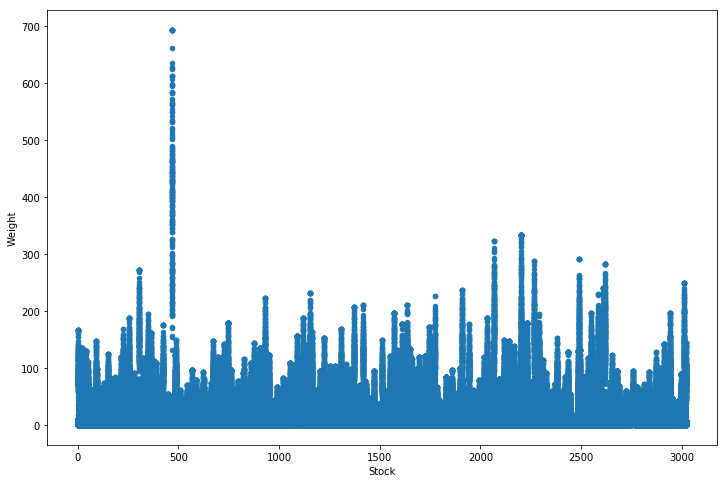

In [17]:
training_data.plot(x='Stock', y='Weight', kind='scatter', figsize=(12, 8))
plt.show()

In [ ]:
pd.plotting.scatter_matrix(training_data[training_data['Stock'] == 467], alpha=0.2, figsize=(18, 18))